<a href="https://colab.research.google.com/github/Ciela-Institute/Bayesian_Inference_Tutorial/blob/main/Ciela_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install emcee

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import importlib
import physical_model as pm
import helpers as hp
import inference_tools
import inference1
import inference2
import inference3
import inference4

importlib.reload(inference_tools)
importlib.reload(hp)
importlib.reload(inference3)
importlib.reload(inference4)

<module 'inference4' from '/content/inference4.py'>

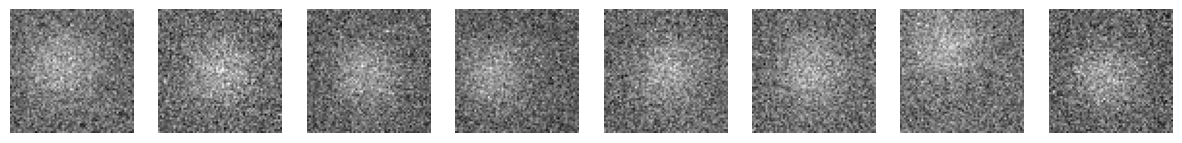

In [2]:

N = 8  # Number of observations of different galaxies
noisy_images , noise_rms , ground_truth_pars = pm.generate_noisy_data(N)

hp.display_images(noisy_images)



# Choose a single image for inference
image_index = 0
data = noisy_images[image_index]
ground_truth_x, ground_truth_y = ground_truth_pars[image_index]

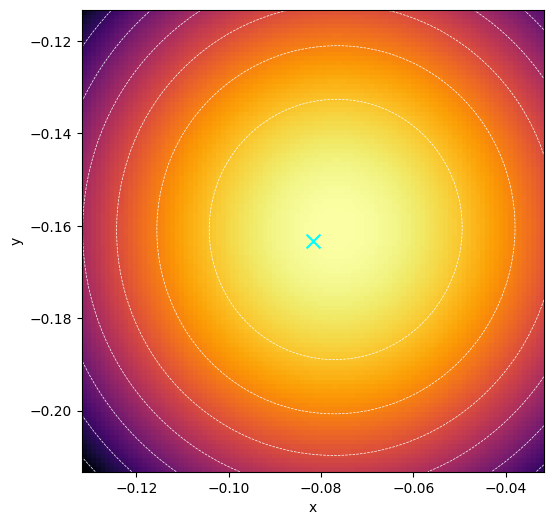

In [3]:
log_posterior_values_np , X_mesh_np , Y_mesh_np = inference1.grided_inference(data, noise_rms , centerX=ground_truth_x,centerY=ground_truth_y,extent=0.1)

fig, ax = hp.display_gridded_posterior(log_posterior_values_np.detach() , X_mesh_np , Y_mesh_np , ground_truth_x,ground_truth_y)

100%|██████████| 1000/1000 [00:36<00:00, 27.48it/s]


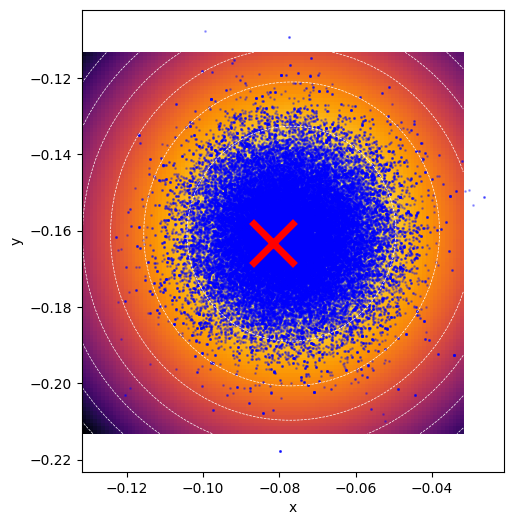

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [5]:
samples = inference2.MCMC_inference(data,noise_rms)

hp.plot_mcmc_sample(samples, ground_truth_x, ground_truth_y, ax=ax , fig=fig)

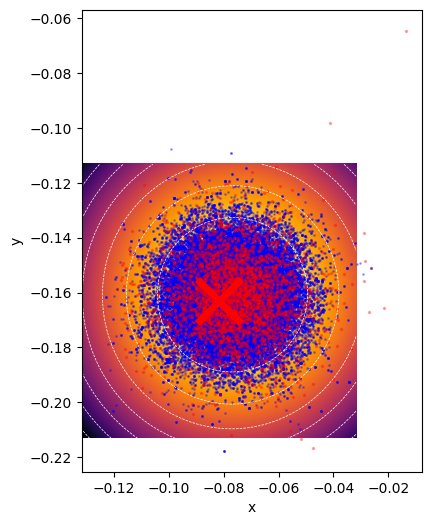

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [6]:
langevin_samples = inference3.Langevin_Inference(4000,data,noise_rms)

hp.plot_langevin_sample(langevin_samples, ground_truth_x, ground_truth_y, ax=ax , fig=fig)

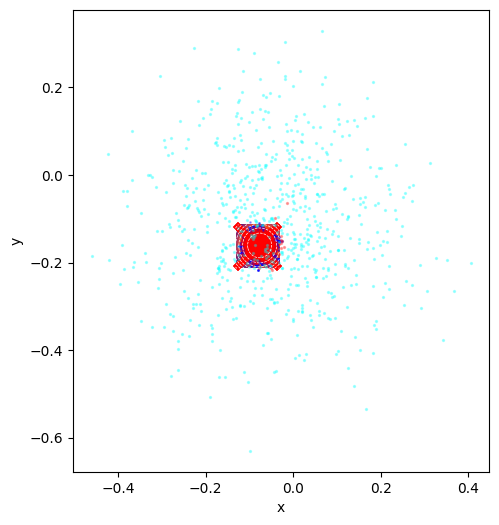

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [7]:
# # Perform ABC inference
ABC_samples = inference4.abc_inference(data, noise_rms, epsilon=1.9, num_trials=50000)
hp.plot_ABC_samples(ABC_samples,ax=ax,fig=fig)